# Kaggle Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [2]:
from math import floor,ceil 

In [348]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [349]:
X = df.drop(['Class','Time'],axis=1)
y = df['Class']

In [238]:
from sklearn.model_selection import train_test_split


In [350]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Outliers Detection

## Extreme Value Analysis: Determine the statistical tails of the underlying distribution of the variable and find the values at the extreme end of the tails.

In [351]:
IQR_train = X_train.quantile(0.75) - X_train.quantile(0.25)
IQR_test = X_test.quantile(0.75) - X_test.quantile(0.25)


In [352]:
upper_bound_train = X_train.quantile(0.75) + (IQR_train * 1.5)
upper_bound_test = X_test.quantile(0.75) + (IQR_test * 1.5)

lower_bound_train = X_train.quantile(0.25) - (IQR_train * 1.5)
lower_bound_test = X_test.quantile(0.25) - (IQR_test * 1.5)

In [353]:
total = X_train.shape[0]
for col in X_train.columns:
    up_b = upper_bound_train[col]
    lw_b = lower_bound_train[col]
    sub1 = X_train[X_train[col] > up_b]
    sub2 = X_train[X_train[col] < lw_b]
    rate_up = sub1.shape[0]
    rate_lw = sub2.shape[0]
    print('col = {}, rate of samples > {} = {}'.format(col,up_b,rate_up))
    print('col = {}, rate of samples < {} = {} \n'.format(col,lw_b,rate_lw))
    
# up = v6 com 7%, v20 e v27 com 6%
# lw = v12 com 5%,v27 e v28 com 6%

col = V1, rate of samples > 4.668008598275191 = 0
col = V1, rate of samples < -4.276654659775279 = 4726 

col = V2, rate of samples > 2.9060685297864195 = 3406
col = V2, rate of samples < -2.7029529796699117 = 5658 

col = V3, rate of samples > 3.899524060129596 = 12
col = V3, rate of samples < -3.7547945263578266 = 2251 

col = V4, rate of samples > 3.1305673122501885 = 6011
col = V4, rate of samples < -3.2382388737064804 = 1492 

col = V5, rate of samples > 2.5559330816884547 = 5723
col = V5, rate of samples < -2.6363136003687053 = 2596 

col = V6, rate of samples > 2.136711714846716 = 14183
col = V6, rate of samples < -2.510633353373759 = 1197 

col = V7, rate of samples > 2.2530437527533733 = 2774
col = V7, rate of samples < -2.2340830874277264 = 3219 

col = V8, rate of samples > 1.128989917363102 = 7958
col = V8, rate of samples < -1.0088046797888761 = 8226 

col = V9, rate of samples > 2.457338796619432 = 3870
col = V9, rate of samples < -2.5030622771810815 = 1678 

col = V10, r

### How many outliers are frauds

In [279]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [205]:
data = df.drop(['Time'],axis=1)
IQR = data.quantile(0.75) - data.quantile(0.25)



In [206]:
upper_bound = data.quantile(0.75) + (IQR * 1.5)
lower_bound = data.quantile(0.25) - (IQR * 1.5)


In [207]:
IQR.drop(['Class'],inplace=True)

In [208]:
upper_bound.drop(['Class'],inplace=True)
lower_bound.drop(['Class'],inplace=True)

In [209]:
total = data.shape[0]
for col in data.drop(['Class'],axis=1).columns:
    up_b = upper_bound[col]
    lw_b = lower_bound[col]
    sub1 = data[data[col] > up_b]
    sub2 = data[data[col] < lw_b]
    rate_up = sub1.shape[0]/total
    rate_lw = sub2.shape[0]/total
    print('col = {}, rate of samples > {} = {}'.format(col,up_b,rate_up))
    print('col = {}, rate of samples < {} = {} \n'.format(col,lw_b,rate_lw))
    
    if rate_up >= 0.05:
        print('Upper')
        print('Number of frauds={},total= {},rate={} \n'.format(sub1['Class'].sum(),sub1.shape[0],sub1['Class'].sum()/sub1.shape[0]))
    
    if rate_lw >= 0.05:
        print('Lower')
        print('Number of frauds={},total= {},rate={} \n'.format(sub2['Class'].sum(),sub2.shape[0],sub2['Class'].sum()/sub2.shape[0]))


col = V1, rate of samples > 4.669664311280145 = 0.0
col = V1, rate of samples < -4.274396001792602 = 0.024795738868777804 

col = V2, rate of samples > 2.907134548297611 = 0.017892818645609133
col = V2, rate of samples < -2.701960590522432 = 0.029598991597818872 

col = V3, rate of samples > 3.9035361133965982 = 7.022299311463552e-05
col = V3, rate of samples < -3.7667054090861836 = 0.011737773299111328 

col = V4, rate of samples > 3.1313133981683787 = 0.03126678768429147
col = V4, rate of samples < -3.236612225031064 = 0.007875508677806373 

col = V5, rate of samples > 2.5672117056694685 = 0.02953227975435997
col = V5, rate of samples < -2.646882336821933 = 0.013637305262862219 

col = V6, rate of samples > 2.148855653580996 = 0.07448201764703817
col = V6, rate of samples < -2.51858636568538 = 0.006151534196842072 

Upper
Number of frauds=16,total= 21213,rate=0.0007542544666006694 

col = V7, rate of samples > 2.2572040007487804 = 0.01452913727541809
col = V7, rate of samples < -2.24

## Standard Score (Z Score):  Represents how many standard deviations a given measurement deviates from the mean. In other words it merely re-scales, or standardizes your data. A Z-score serves to specify the precise location of each observation within a distribution. The sign of the Z-score (+ or — ) indicates whether the score is above (+) or below ( — ) the mean. Once we’ve centered and rescaled the data, anything that is too far from zero (the threshold is usually a Z-score of 3 or -3) should be considered an outlier.
### $z=\frac{x-\mu}{\sigma}$

### Transforms the mean to 0 and the std to 1, it DOES NOT transforms into a Normal(0,1) (only if it's already normally distributed)


In [183]:
from sklearn.preprocessing import scale

In [184]:
X_train_z=scale(X_train)
X_test_z=scale(X_test)

In [185]:
X_train_z.mean()

1.7719334258841845e-19

In [186]:
X_train_z.std()

0.9999999999999997

In [187]:
X_train_z = pd.DataFrame(data=X_train_z,columns=X_train.columns,index=X_train.index)
X_test_z = pd.DataFrame(data=X_test_z,columns=X_test.columns,index=X_test.index)

In [188]:
total = X_train_z.shape[0]
for col in X_train_z.columns:
    up_b = 3
    lw_b = -3
    sub1 = X_train_z[X_train_z[col] > up_b]
    sub2 = X_train_z[X_train_z[col] < lw_b]
    print('col = {}, rate of samples > {} = {}'.format(col,up_b,sub1.shape[0]/total))
    print('col = {}, rate of samples < {} = {} \n'.format(col,lw_b,sub2.shape[0]/total))

#nenhuma taxa significante

col = V1, rate of samples > 3 = 0.0
col = V1, rate of samples < -3 = 0.01288648988575621 

col = V2, rate of samples > 3 = 0.004962792160150928
col = V2, rate of samples < -3 = 0.009852216748768473 

col = V3, rate of samples > 3 = 0.0
col = V3, rate of samples < -3 = 0.0069175138874331835 

col = V4, rate of samples > 3 = 0.01005659784089718
col = V4, rate of samples < -3 = 0.0008280054501624567 

col = V5, rate of samples > 3 = 0.004826538098731789
col = V5, rate of samples < -3 = 0.0053139083953464 

col = V6, rate of samples > 3 = 0.01389267372392831
col = V6, rate of samples < -3 = 0.0021748244418824023 

col = V7, rate of samples > 3 = 0.004852740802850854
col = V7, rate of samples < -3 = 0.006681689550361598 

col = V8, rate of samples > 3 = 0.0034220731579499004
col = V8, rate of samples < -3 = 0.011398176291793313 

col = V9, rate of samples > 3 = 0.007106173357090451
col = V9, rate of samples < -3 = 0.0010428676239387904 

col = V10, rate of samples > 3 = 0.010025154595954303

# Outliers Handle

## Top Coding: Top Coding means capping the maximum of the distribution at an arbitrary set value. By implementing top coding, the outlier is capped at a certain maximum value and looks like many other observations.
## Bottom coding: Is analogous but on the left side of the distribution. That is, all values below a certain threshold, are capped to that threshold. If the threshold is zero, then it is known as zero-coding. 

In [280]:
for col in X_train.columns:
    up_b_train = upper_bound_train[col]
    lw_b_train = lower_bound_train[col]
    X_train.loc[X_train[col]>up_b_train,col] = up_b_train
    X_train.loc[X_train[col]<lw_b_train,col] = lw_b_train

    up_b_test = upper_bound_test[col]
    lw_b_test = lower_bound_test[col]
    X_test.loc[X_test[col]>up_b_test,col] = up_b_test
    X_test.loc[X_test[col]<lw_b_test,col] = lw_b_test

/home/titowoche30/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/titowoche30/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/titowoche30/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [325]:
scaler=MinMaxScaler()

normalized_data_train = scaler.fit_transform(X_train)
X_train.at[:] = normalized_data_train

normalized_data_test = scaler.transform(X_test)
X_test.at[:] = normalized_data_test

/home/titowoche30/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/titowoche30/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value
/home/titowoche30/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [326]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,...,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000,190820.000000
mean,0.958242,0.767234,0.920309,0.251922,0.765718,0.263001,0.265367,0.785385,0.562751,0.617238,...,0.580269,0.561470,0.509956,0.665434,0.382169,0.577849,0.425547,0.238385,0.313124,0.003457
std,0.033319,0.017598,0.028842,0.062853,0.009397,0.013449,0.007626,0.012761,0.046339,0.027284,...,0.008314,0.011777,0.033825,0.009398,0.081615,0.029327,0.078787,0.009811,0.006654,0.010079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942623,0.760932,0.903411,0.214253,0.761076,0.255299,0.261996,0.783164,0.535615,0.603798,...,0.578010,0.557790,0.484696,0.663039,0.334432,0.560076,0.372058,0.236686,0.312046,0.000220
50%,0.958490,0.767967,0.923754,0.250988,0.765335,0.260268,0.265613,0.785627,0.560617,0.614908,...,0.579598,0.561002,0.510290,0.665274,0.387754,0.578724,0.417171,0.238428,0.313356,0.000856
75%,0.980613,0.775728,0.939850,0.284834,0.769815,0.266981,0.268830,0.788897,0.588010,0.628624,...,0.581688,0.564480,0.534568,0.667628,0.441421,0.597569,0.465004,0.240600,0.314720,0.003012
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,...,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000,93987.000000
mean,0.958399,0.767308,0.920139,0.251947,0.765713,0.263058,0.265331,0.785386,0.562834,0.617332,...,0.580257,0.561499,0.510184,0.665433,0.382366,0.578024,0.425247,0.238421,0.313124,0.003402
std,0.033189,0.017064,0.028937,0.062585,0.009073,0.013284,0.007351,0.012915,0.046577,0.027437,...,0.007990,0.011970,0.033912,0.009016,0.081602,0.029125,0.078738,0.009546,0.006788,0.008997
min,0.162285,0.260145,0.278874,0.003660,0.528871,0.053195,0.012492,0.244536,-0.004813,0.004646,...,0.282032,0.192494,0.095452,0.177895,0.001587,0.089743,0.087553,-0.305257,0.075474,0.000000
25%,0.942722,0.760963,0.903101,0.214431,0.761031,0.255288,0.261956,0.783123,0.535587,0.603904,...,0.578012,0.557812,0.484801,0.663011,0.334498,0.560173,0.371970,0.236700,0.312055,0.000215
50%,0.958792,0.767921,0.923517,0.251162,0.765379,0.260254,0.265571,0.785621,0.560576,0.614994,...,0.579603,0.561011,0.510465,0.665256,0.387759,0.579049,0.416474,0.238432,0.313344,0.000856
75%,0.980719,0.775764,0.939742,0.284991,0.769875,0.267124,0.268831,0.788898,0.588002,0.628736,...,0.581669,0.564493,0.534938,0.667622,0.441540,0.597653,0.464382,0.240572,0.314696,0.002997
max,0.999733,0.993769,1.098922,0.833934,0.961052,0.479690,0.490017,0.991001,1.221669,1.213372,...,0.790516,1.000000,0.900117,0.993393,0.919972,0.918679,0.991163,0.460065,0.640443,0.389239


In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc,precision_recall_curve

In [189]:
dict_classifiers = {"Random Forest": RandomForestClassifier(random_state=42, n_jobs=3),
    "Nearest Neighborns": KNeighborsClassifier(n_jobs=3),
    "Logistic Regression": LogisticRegression(solver = "liblinear",random_state=42),
    "SVC":SVC(random_state=0,probability=True),
    "Ada Boost":AdaBoostClassifier(random_state=42) 
}

In [190]:
classifiers_names = list(dict_classifiers.keys())
classifiers_values=list(dict_classifiers.values())

In [ ]:
def train_model(model):
    model.fit(X_train,y_train)
    y_test_pred = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred[:,1])
    _auc = auc(recall, precision)
    print('AUC = ',_auc)
    print('\n')
    return times

In [191]:
def train_model(model):
    model.fit(X_train_z,y_train)
    y_test_pred = model.predict_proba(X_test_z)
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred[:,1])
    _auc = auc(recall, precision)
    print('AUC = ',_auc)
    print('\n')
    return times

In [197]:
times=[]
for key,value in zip(classifiers_names,classifiers_values):
    print('------------------{}------------------'.format(key))
    Time=train_model(value)
    times.append(Time)

------------------Random Forest------------------
AUC =  0.8620763382732953


------------------Nearest Neighborns------------------
AUC =  0.7922532338470729


------------------Logistic Regression------------------
AUC =  0.7857946049663416


------------------SVC------------------
AUC =  0.7417917938934262


------------------Ada Boost------------------
AUC =  0.7707813793561108




In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [328]:
model = RandomForestClassifier(random_state=42, n_jobs=3)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=3,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [329]:
y_pred_test = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
conf_matrix

array([[93829,     9],
       [   29,   120]])

In [330]:
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]
print('True Negatives = ',TN)
print('True Positives = ', TP)
print('False Positives - Erro Tipo I = ',FP)
print('False Negatives - Erro Tipo II = ', FN)

True Negatives =  93829
True Positives =  120
False Positives - Erro Tipo I =  9
False Negatives - Erro Tipo II =  29


## Accuracy: Percent of predictions were correct.

In [331]:
model.score(X_train,y_train)

1.0

In [332]:
model.score(X_test,y_test)

0.9995956887654676

## Recall(TruePositiveRate):  Percent of the positive (fraudulent) cases that were correctly predicted: $\frac{TP}{TP+FN}$

In [226]:
# Percentual dos positivos corretamente preditos

In [333]:
recall = TP/(TP+FN)
recall

0.8053691275167785

### Caught 80.5% of the fraudulent transactions

## Precision:  Percent of positive (fraudulent) predictions that  were correctly predicted: $\frac{TP}{TP+FP}$

In [228]:
# Percentual das predições positivas corretas, quantos dos positivos estão corretos

In [334]:
precision=TP/(TP+FP)
precision

0.9302325581395349

### When it predicts that a transaction is fraudulent, is correct in 93.0% of the time 

## F1-Score:  Combines Recall and Precision to one performance metric, is usually more useful than Accuracy, especially if you have an uneven class distribution : $2 * \frac{Recall*Precision}{Recall+Precision}$

In [335]:
2 * ((recall*precision)/(recall+precision))

0.8633093525179855

In [336]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.93      0.81      0.86       149

    accuracy                           1.00     93987
   macro avg       0.96      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987



## FalsePositiveRate:  Percent of negative (non-fraudulent) predictions that were incorrectly predicted: $\frac{FP}{FP+TN}$

In [337]:
FP/(FP+TN)

9.590997250580788e-05

###  Approximately 0.00959100% of the non-fraudulent transactions were classified incorrectly as fraudulent transactions.

# ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them. ROC curve is created by plotting the True Positive Pate (TPR) against the False Positive Rate (FPR) at various threshold settings. 

In [338]:
y_test_probs = model.predict_proba(X_test)

In [295]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [339]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs[:,1])

In [340]:
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91,
       0.9 , 0.89, 0.88, 0.87, 0.85, 0.84, 0.83, 0.82, 0.79, 0.78, 0.77,
       0.76, 0.75, 0.74, 0.72, 0.71, 0.68, 0.67, 0.64, 0.63, 0.62, 0.59,
       0.57, 0.55, 0.5 , 0.49, 0.47, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.36,
       0.34, 0.3 , 0.28, 0.26, 0.24, 0.23, 0.22, 0.19, 0.17, 0.16, 0.15,
       0.14, 0.13, 0.12, 0.11, 0.1 , 0.08, 0.07, 0.06, 0.05, 0.04, 0.03,
       0.02, 0.01, 0.  ])

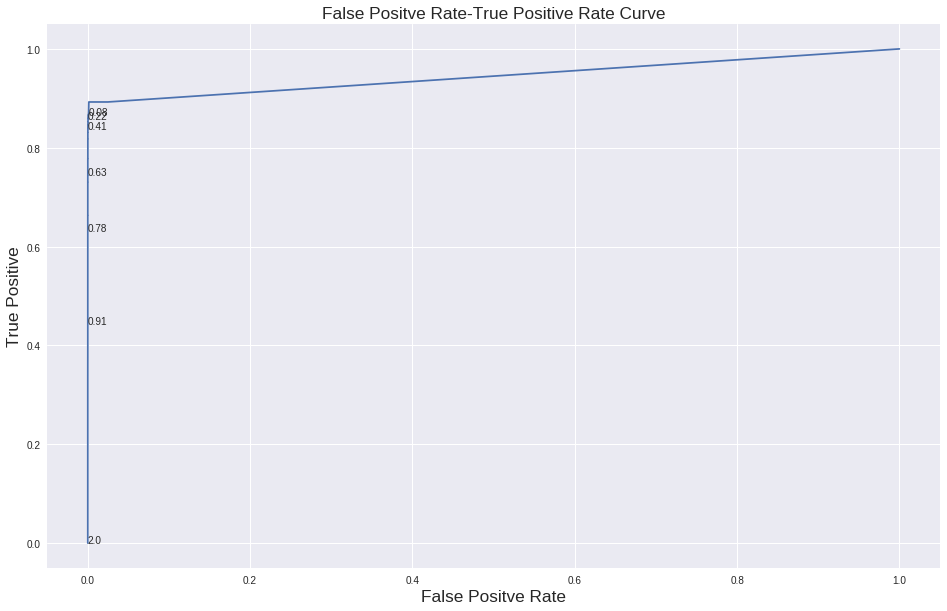

In [341]:
plt.figure(figsize=(16,10))
plt.title('False Positve Rate-True Positive Rate Curve',size='xx-large')
plt.xlabel('False Positve Rate',size='xx-large')
plt.ylabel('True Positive',size='xx-large')
texts = list(zip(thresholds,fpr,tpr))
for i in range(0,len(texts),10): plt.annotate(texts[i][0], (texts[i][1], texts[i][2]))
plt.plot(fpr,tpr)

In [342]:
_auc = roc_auc_score(y_test, y_test_probs[:,1])
_auc

0.9449285080914116

# A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.

In [343]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs[:,1])


In [344]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.22, 0.23, 0.24,
       0.26, 0.27, 0.28, 0.3 , 0.31, 0.32, 0.34, 0.36, 0.37, 0.38, 0.39,
       0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.47, 0.49, 0.5 , 0.53, 0.54,
       0.55, 0.57, 0.59, 0.6 , 0.62, 0.63, 0.64, 0.67, 0.68, 0.69, 0.71,
       0.72, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.82, 0.83, 0.84, 0.85,
       0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96,
       0.97, 0.98, 0.99, 1.  ])

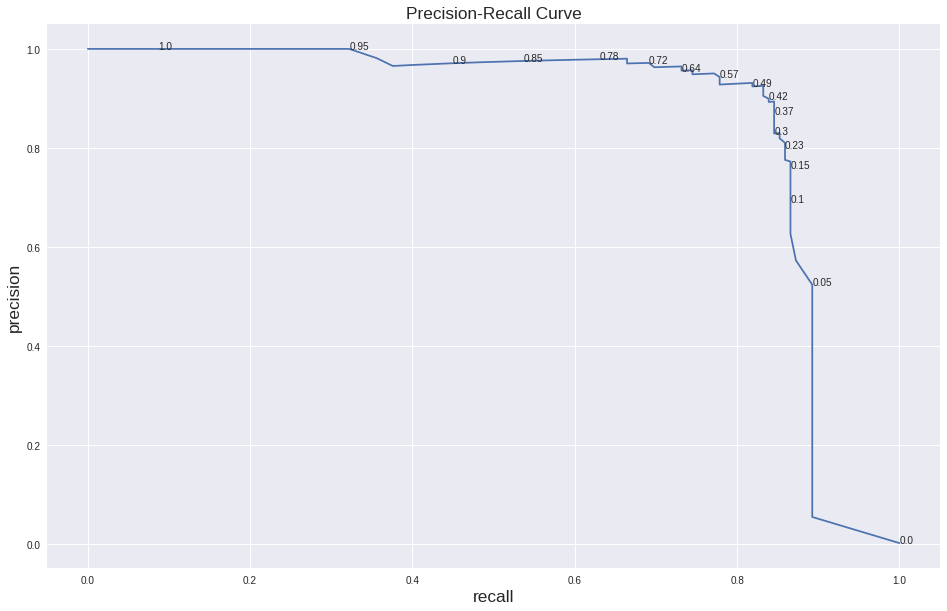

In [345]:
plt.figure(figsize=(16,10))
plt.title('Precision-Recall Curve',size='xx-large')
plt.ylabel('precision',size='xx-large')
plt.xlabel('recall',size='xx-large')
texts = list(zip(thresholds,recall,precision))
for i in range(0,len(texts),5): plt.annotate(texts[i][0], (texts[i][1], texts[i][2]))
plt.plot(recall,precision)

In [346]:
_auc = auc(recall, precision)
_auc

0.8619174592856185

# ROC curves should be used when there are roughly equal numbers of observations for each class.

# Precision-Recall curves should be used when there is a moderate to large class imbalance.(our case)